In [ ]:
#1.Import dataset and display first 5 rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/tvmarketing.csv")
print(df.head())



      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [ ]:
#2. Check column data types
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [ ]:
#3.Check the shape of the Data Frame (rows, columns)
print(df.shape)

(200, 2)


In [ ]:
#4. Look at summary statistics
print(df.describe)

<bound method NDFrame.describe of         TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]>


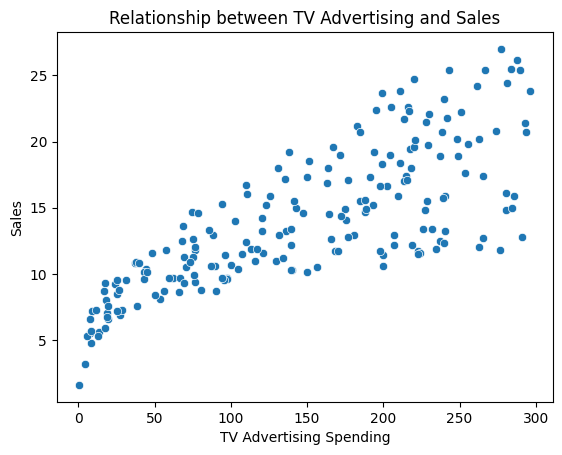

In [ ]:
#5. Visualize the relationship between the features and the dependent variable using scatter plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Relationship between TV Advertising and Sales')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.show()


In [ ]:
#6. Prepare X (feature variables) and y (response variable)
x=df[['TV']]
y=df['Sales']

In [ ]:
#7.Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test
from sklearn.model_selection import train_test_split as s
x_train,x_test,y_train,y_test=s(x,y,test_size=0.3,random_state=42)



x_train:  (140, 1)
y_train:  (140,)
x_test:  (60, 1)
y_test:  (60,)


In [ ]:
#8.Print the shape of train data and test data
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
#9. Perform Linear Regression (on train data) without using any library and print the coefficients values
# Calculate the means of x and y
x_mean = np.mean(x_train['TV'])
y_mean = np.mean(y_train)

# Calculate the terms needed for the formulas
n = len(x_train)
numerator = 0
denominator = 0
for i in range(n):
    x_val = x_train['TV'].iloc[i]
    y_val = y_train.iloc[i]
    numerator += (x_val - x_mean) * (y_val - y_mean)
    denominator += (x_val - x_mean)**2

# Calculate the slope (m) and y-intercept (c)
m = numerator / denominator
c = y_mean - (m * x_mean)

# Print the coefficients
print("Coefficient (m):", m)
print("Intercept (c):", c)

Coefficient (m): 0.04640780212815275
Intercept (c): 7.23945983075114


In [ ]:
#10.Create the model using the calculated coefficients and make predictions on the testing set
# Create a function to predict Sales using the calculated coefficients
def predict_sales(TV_advertising, m, c):
  """Predicts Sales based on TV advertising spending using the linear regression model.

  Args:
    TV_advertising: The TV advertising spending.
    m: The slope of the regression line.
    c: The y-intercept of the regression line.

  Returns:
    The predicted Sales.
  """
  predicted_sales = m * TV_advertising + c
  return predicted_sales

# Make predictions on the testing set
y_pred = predict_sales(x_test['TV'], m, c)

# Evaluate the model (optional)
# You can use metrics like Mean Squared Error (MSE) or R-squared to evaluate the model's performance.
# For example, to calculate MSE:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

#To see the output, run the code.

In [ ]:
##11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#12.Print the intercept and coefficients
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  7.239459830751138
Coefficients:  [0.0464078]


In [ ]:
#13.Make predictions on the testing set - y_pred
y_pred=model.predict(x_test)
#print(y_pred)

[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


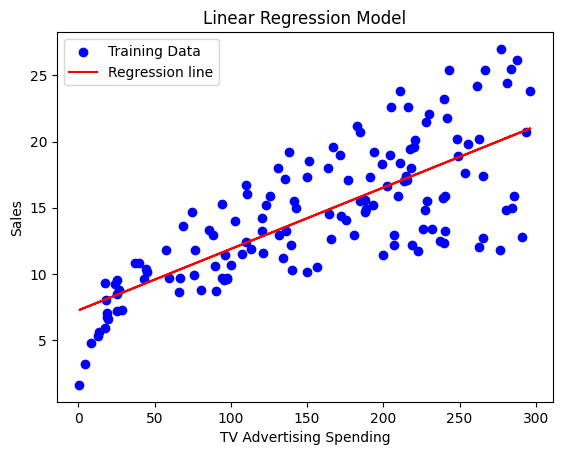

In [ ]:
#14.Plot train data and the model
plt.scatter(x_train, y_train, color='blue',label='Training Data')
plt.plot(x_train, model.predict(x_train), color='red',label='Regression line')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

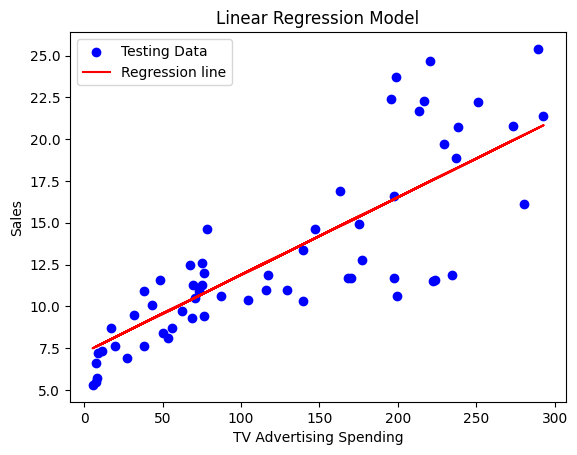

In [ ]:
#15.Plot test data and the model
plt.scatter(x_test, y_test, color='blue', label='Testing Data')
plt.plot(x_test,model.predict(x_test), color='red', label='Regression line')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [ ]:
#16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 8.970991242413614
R-squared: 0.6714477229302764


In [ ]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
y_test_mean=np.mean(y_test)
y_pred_mean=np.mean(y_pred)
TSS=np.sum((y_test - y_test_mean)**2)
RSS=np.sum((y_test - y_pred)**2)
R_squared=1-(RSS/TSS)
n=len(y_test)
p=1
Adjusted_R_squared=1-(1-R_squared)*(n-1)/(n-p-1)
print("R-squared: ",R_squared)
print("Adjusted R-squared:", Adjusted_R_squared)

R-squared:  0.6714477229302764
Adjusted R-squared: 0.6657830284980398
